In [1]:
using FilePaths, VegaLite, CSV, DataFrames, StatsKit, Plots, VegaDatasets, Query; gr();

path = "../data/2016-2022.csv"
df = DataFrame(CSV.File(path))

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision
,Int64,Int64,String15,Float64,String31,Int64,Int64
1,8912977,356,IND107923,107923.0,18 March 2022,2022,1
2,8912990,356,IND107846,107846.0,18 March 2022,2022,1
3,8913012,356,IND107941,107941.0,18 March 2022,2022,1
4,8913089,356,IND107842,107842.0,18 March 2022,2022,1
5,8913091,356,IND107850,107850.0,18 March 2022,2022,1
6,8913095,356,IND107873,107873.0,18 March 2022,2022,1
7,8913119,356,IND107754,107754.0,18 March 2022,2022,2
8,8913123,356,IND107752,107752.0,18 March 2022,2022,2
9,8913124,356,IND107723,107723.0,18 March 2022,2022,2


In [4]:
#wykorzystałam element kodu Hani by stworzyć mapki roczne
df_2022 = @from i in df begin
    @where i.year == 2022
    @select {i.event_date, i.event_type, i.sub_event_type, i.location, i.latitude, i.longitude}
    @collect DataFrame
end
df_2022

,event_date,event_type,sub_event_type,location,latitude
,String31,String31,String,String31,Float64
1,18 March 2022,Riots,Mob violence,Kishanpur,25.6422
2,18 March 2022,Protests,Peaceful protest,Mumbai - Azad Maidan,18.9388
3,18 March 2022,Protests,Peaceful protest,Ahmedgarh,30.6785
4,18 March 2022,Protests,Peaceful protest,Indore,22.7179
5,18 March 2022,Riots,Mob violence,Kanavar,26.5622
6,18 March 2022,Riots,Mob violence,Indore,22.7179
7,18 March 2022,Protests,Peaceful protest,Hyderabad,17.384
8,18 March 2022,Protests,Peaceful protest,Dummugudem,17.8512
9,18 March 2022,Protests,Peaceful protest,Kothagudem,17.551


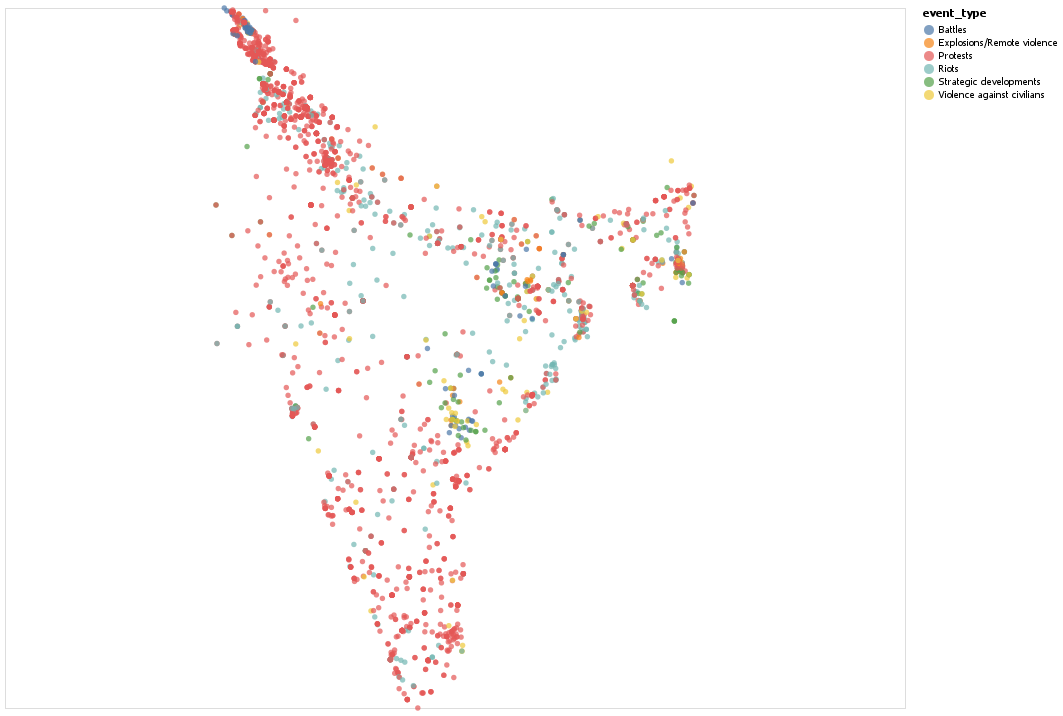

In [5]:
@vlplot(width=900, height=700) +
@vlplot(
    :circle,
    data=df_2022,
    projection={type=:equalEarth},
    longitude="longitude",
    latitude="latitude",
    color=:event_type,
)